In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
%matplotlib inline

In [4]:
order = pd.read_csv ("C:\\Users\\USER\\Documents\\Rubiscape\\olist ecommerce analysis\\olist_orders_dataset.csv")
order_items = pd.read_csv ("C:\\Users\\USER\\Documents\\Rubiscape\\olist ecommerce analysis\\olist_order_items_dataset.csv")
customers = pd.read_csv ("C:\\Users\\USER\\Documents\\Rubiscape\\olist ecommerce analysis\\olist_customers_dataset.csv")
payments = pd.read_csv ("C:\\Users\\USER\\Documents\\Rubiscape\\olist ecommerce analysis\\olist_order_payments_dataset.csv")
products = pd.read_csv ("C:\\Users\\USER\\Documents\\Rubiscape\\olist ecommerce analysis\\olist_products_dataset.csv")

In [5]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for i in date_cols:
  order[i] = pd.to_datetime(order[i])

In [8]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [9]:
diff = (order['order_approved_at'] - order['order_purchase_timestamp']).median()
order['order_approved_at'].fillna(order['order_purchase_timestamp'] + diff,inplace=True)

In [10]:
diff = (order['order_delivered_customer_date'] - order['order_approved_at']).median()
order['order_delivered_customer_date'].fillna(order['order_approved_at'] + diff,inplace=True)

In [11]:
order['delayed'] = np.where(order['order_delivered_customer_date']>order['order_estimated_delivery_date'],1,0)

In [12]:
order['delivery_time_duration'] = order['order_delivered_customer_date'] - order['order_purchase_timestamp']

In [13]:
products.isnull().sum()

product_id                      0
product_category_name         610
product category name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [14]:
products['product_weight_g'].fillna(products['product_weight_g'].mean(),inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].mean(),inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].mean(),inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].mean(),inplace=True)

merging datasets

In [15]:
ord_prod =pd.merge(order_items, products, on="product_id", how="outer", indicator=True)
ord_prod.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product category name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,both
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,both
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,both
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,both
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,both


In [16]:
cust_ord =pd.merge(order, customers, on="customer_id", how="outer", indicator=True)
cust_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,both
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,both
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,9 days 09:27:40,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,both
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,13 days 05:00:36,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,both
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,2 days 20:58:23,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,both


In [17]:
ord_pay = pd.merge(cust_ord, payments, on="order_id", how="outer")
ord_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,_merge,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,both,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,both,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,both,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,both,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,9 days 09:27:40,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,both,1.0,credit_card,3.0,179.12


In [18]:
ord_final = pd.merge(ord_pay, ord_prod, on="order_id", how="outer")
ord_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration,...,product_category_name,product category name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,...,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,both
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,...,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,both
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,...,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,both
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08,...,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,both
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,9 days 09:27:40,...,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,both


In [19]:
ord_final=ord_final.drop({'_merge_x','_merge_y'},axis='columns')

In [20]:
ord_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       118434 non-null  object         
 1   customer_id                    118434 non-null  object         
 2   order_status                   118434 non-null  object         
 3   order_purchase_timestamp       118434 non-null  datetime64[ns] 
 4   order_approved_at              118434 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   116360 non-null  datetime64[ns] 
 6   order_delivered_customer_date  118434 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  118434 non-null  datetime64[ns] 
 8   delayed                        118434 non-null  int32          
 9   delivery_time_duration         118434 non-null  timedelta64[ns]
 10  customer_unique_id             118434 non-null  object  

In [21]:
ord_final.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     2074
order_delivered_customer_date       0
order_estimated_delivery_date       0
delayed                             0
delivery_time_duration              0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
product_category_name            2528
product category name            2553
product_name

In [22]:
# Most number of product delivered
ord_final.product_category_name.value_counts().nlargest(10)

cama_mesa_banho           11823
beleza_saude               9975
esporte_lazer              8945
moveis_decoracao           8744
informatica_acessorios     8082
utilidades_domesticas      7355
relogios_presentes         6201
telefonia                  4721
ferramentas_jardim         4574
automotivo                 4379
Name: product_category_name, dtype: int64

<Axes: >

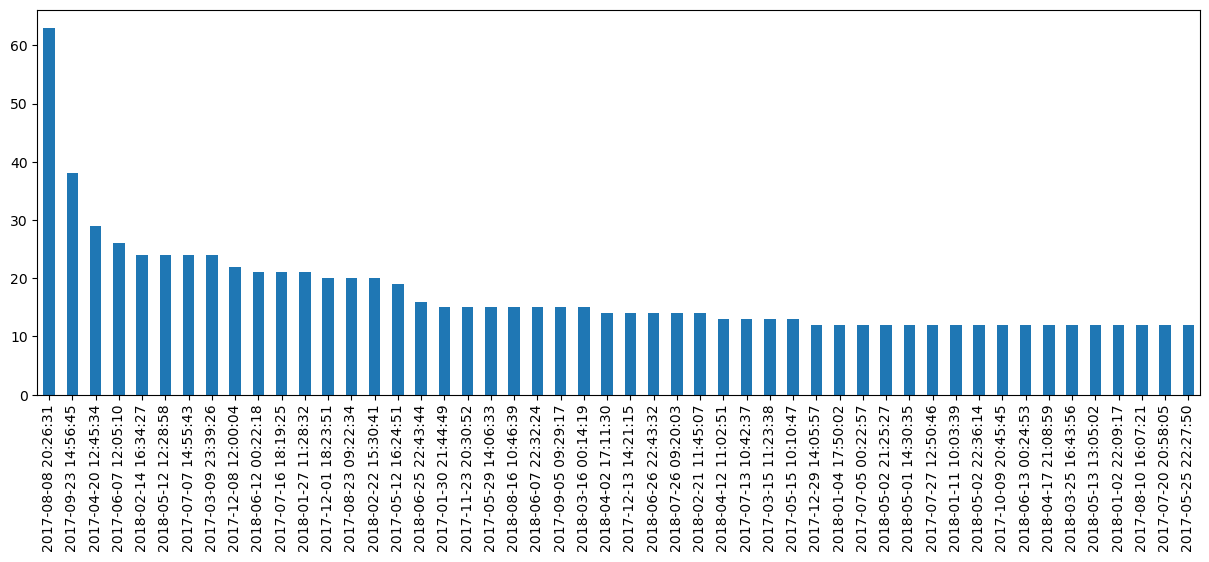

In [23]:
# we need to understand the growth of purchase from olist store within these years.
ord_final['order_purchase_timestamp'].value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [24]:
ord_final['payment_type'].value_counts()

credit_card    87286
boleto         23037
voucher         6407
debit_card      1698
not_defined        3
Name: payment_type, dtype: int64

In [25]:
pd.DataFrame(ord_final['payment_sequential'].value_counts()).head(10)

,payment_sequential
1.0,113332
2.0,3397
3.0,651
4.0,318
5.0,191
6.0,134
7.0,92
8.0,61
9.0,50
10.0,41


<Axes: >

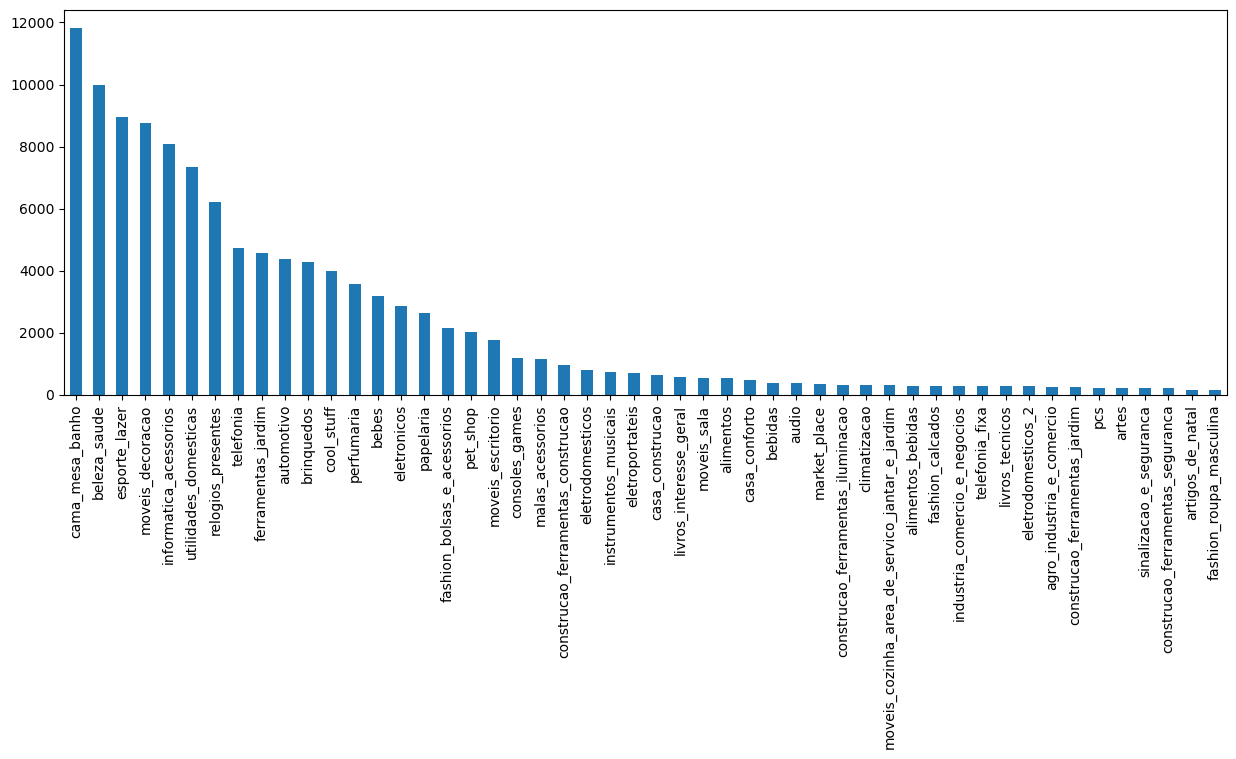

In [26]:
ord_final['product_category_name'].value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [27]:
order_monthly = ord_final[['order_approved_at']].groupby(ord_final['order_approved_at'].dt.to_period('M')).agg({'order_approved_at':'count'})
order_monthly.head()

,order_approved_at
order_approved_at,
2016-09,3
2016-10,400
2016-12,1
2017-01,969
2017-02,2108


In [28]:
order_daily = ord_final[['order_approved_at']].groupby(ord_final['order_approved_at'].dt.dayofweek.sort_index()).count()
order_daily

,order_approved_at
order_approved_at,
0,15565
1,22746
2,18818
3,18575
4,17611
5,14586
6,10533


In [29]:
daily_trend_index = order_daily.rename(columns = {'order_approved_at': 'num_of_orders'})
daily_trend = daily_trend_index.reset_index()
daily_trend

,order_approved_at,num_of_orders
0,0,15565
1,1,22746
2,2,18818
3,3,18575
4,4,17611
5,5,14586
6,6,10533


In [30]:
dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in range(7):
  daily_trend['order_approved_at'] = daily_trend['order_approved_at'].replace(i,dow[i])
daily_trend

,order_approved_at,num_of_orders
0,Monday,15565
1,Tuesday,22746
2,Wednesday,18818
3,Thursday,18575
4,Friday,17611
5,Saturday,14586
6,Sunday,10533


In [31]:
payment_count_index = ord_final[['payment_type']].groupby(ord_final['payment_type']).count()
payment_count_index = payment_count_index.rename(columns = {'payment_type':'num_of_payment'})
payment_count = payment_count_index.reset_index()
payment_count

,payment_type,num_of_payment
0,boleto,23037
1,credit_card,87286
2,debit_card,1698
3,not_defined,3
4,voucher,6407


RFM Modelling:
Todo the RFM analysis, we need to create 3 freatures from the data:

Recency: Latest date- last purchase date
Frequency: Total no. of transactions made by a single customer (count of order id)
Monetary: Total value of transacted sales by each customer.

In [32]:
#find the last date on which customer made the purchase
recency=pd.DataFrame(ord_final.groupby('product_id')['order_purchase_timestamp'].max().reset_index())

In [33]:
recency['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

In [34]:
#I take the maximum date of purchase made by customers as the date to calculate the recency of the purchase
#2018-10-17
recency['recent_days']=(recency['order_purchase_timestamp'].max()-recency['order_purchase_timestamp']).dt.days
recency

,product_id,order_purchase_timestamp,recent_days
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20 18:45:21,105
1,00088930e925c41fd95ebfe695fd2655,2017-12-12 19:20:28,264
2,0009406fd7479715e4bef61dd91f2462,2017-12-21 16:21:47,255
3,000b8f95fcb9e0096488278317764d19,2018-08-10 13:24:35,23
4,000d9be29b5207b54e86aa1b1ac54872,2018-04-03 09:24:12,152
...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2017-09-03 11:38:54,364
32947,fff81cc3158d2725c0655ab9ba0f712c,2018-07-30 09:18:59,34
32948,fff9553ac224cec9d15d49f5a263411f,2017-10-06 16:44:05,331
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-10 17:15:07,23


frequency

In [35]:
#the number of times a unique customer has made purchase
frequency=pd.DataFrame(ord_final.groupby('product_id')['customer_id'].count().reset_index())
frequency

,product_id,customer_id
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5


monetary

In [36]:
monetary=pd.DataFrame(ord_final[['product_id','payment_value']].groupby('product_id')['payment_value'].sum().reset_index())
monetary

,product_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,120.24
1,00088930e925c41fd95ebfe695fd2655,143.83
2,0009406fd7479715e4bef61dd91f2462,242.10
3,000b8f95fcb9e0096488278317764d19,157.00
4,000d9be29b5207b54e86aa1b1ac54872,218.27
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,285.39
32947,fff81cc3158d2725c0655ab9ba0f712c,97.89
32948,fff9553ac224cec9d15d49f5a263411f,43.85
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,228.82


In [37]:
#now I will merge recency,frequency and monetary dataframe
df_rfm=pd.merge(recency,frequency,on='product_id')
df_rfm=pd.merge(df_rfm,monetary,on='product_id')
df_rfm

,product_id,order_purchase_timestamp,recent_days,customer_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20 18:45:21,105,1,120.24
1,00088930e925c41fd95ebfe695fd2655,2017-12-12 19:20:28,264,1,143.83
2,0009406fd7479715e4bef61dd91f2462,2017-12-21 16:21:47,255,1,242.10
3,000b8f95fcb9e0096488278317764d19,2018-08-10 13:24:35,23,2,157.00
4,000d9be29b5207b54e86aa1b1ac54872,2018-04-03 09:24:12,152,1,218.27
...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2017-09-03 11:38:54,364,2,285.39
32947,fff81cc3158d2725c0655ab9ba0f712c,2018-07-30 09:18:59,34,1,97.89
32948,fff9553ac224cec9d15d49f5a263411f,2017-10-06 16:44:05,331,1,43.85
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-10 17:15:07,23,5,228.82


In [38]:
#dropping unneccesary column
df_rfm.drop(['order_purchase_timestamp'],axis=1,inplace=True)
df_rfm

,product_id,recent_days,customer_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24
1,00088930e925c41fd95ebfe695fd2655,264,1,143.83
2,0009406fd7479715e4bef61dd91f2462,255,1,242.10
3,000b8f95fcb9e0096488278317764d19,23,2,157.00
4,000d9be29b5207b54e86aa1b1ac54872,152,1,218.27
...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,364,2,285.39
32947,fff81cc3158d2725c0655ab9ba0f712c,34,1,97.89
32948,fff9553ac224cec9d15d49f5a263411f,331,1,43.85
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,23,5,228.82


In [39]:
# Recency= Days from last purchase
#Frequency= Number of purchase made
#Monetary= total amount purchased by a customer
df_rfm.columns=['product_id','Recency','Frequency','Monetary']
df_rfm.reset_index()
df_rfm.set_index("product_id",inplace=True)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
df_rfm_log = df_rfm.copy()
print(df_rfm_log.describe())

            Recency     Frequency       Monetary
count  32951.000000  32951.000000   32951.000000
mean     211.994689      3.569057     616.313153
std      160.308232     11.007599    2166.897224
min        0.000000      1.000000       9.590000
25%       73.000000      1.000000      92.295000
50%      181.000000      1.000000     198.440000
75%      320.000000      3.000000     480.280000
max      728.000000    536.000000  109312.640000


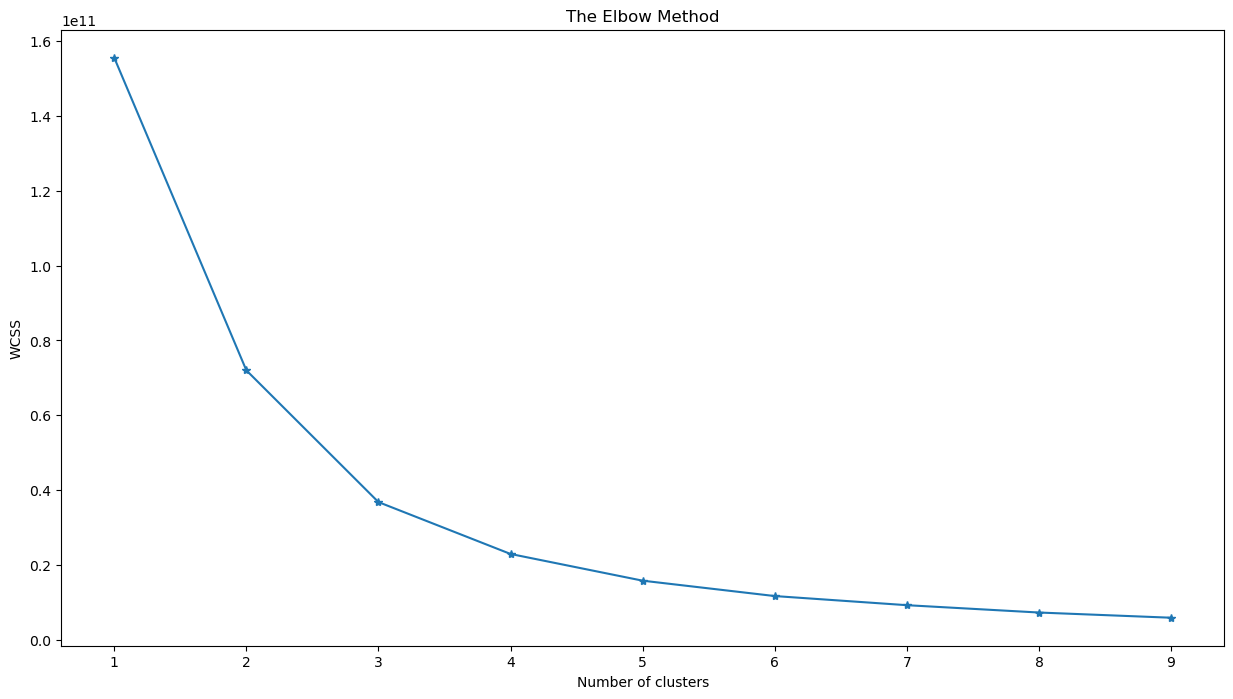

In [42]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_rfm_log)
    wcss.append(kmeans.inertia_)

f, ax = plt.subplots(figsize=(15, 8))  
plt.style.use('_classic_test_patch')  
plt.plot(range(1, 10), wcss, '-*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

In [43]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(df_rfm_log)
cluster_labels = kmeans.labels_
data_rfm_k4 = df_rfm_log.assign(Cluster=cluster_labels)
grouped = data_rfm_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': ['min' ,'mean', 'max'],
    'Frequency': ['min','mean', 'max'],
    'Monetary': ['min','mean', 'max', 'count']
  }).round(1)

Recency             Frequency             Monetary                     \
            min   mean  max       min   mean  max      min     mean       max   
Cluster                                                                         
0             0  215.6  728         1    2.5   70      9.6    343.9    2339.1   
1             7   87.4  375         8  228.6  536  38511.9  58640.8  109312.6   
2             6  106.2  580         4   67.9  283  11020.3  17441.9   36489.2   
3             4  140.3  697         1   18.3  150   2342.3   4344.4   10863.2   

                
         count  
Cluster         
0        31470  
1           21  
2          146  
3         1314

In [44]:
data_melt = pd.melt(
                    data_rfm_k4.reset_index(),               
                    id_vars=['product_id', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                    var_name='Metric', value_name='Value'
                    )
data_melt.head(20)

,product_id,Cluster,Metric,Value
0,00066f42aeeb9f3007548bb9d3f33c38,0,Recency,105.0
1,00088930e925c41fd95ebfe695fd2655,0,Recency,264.0
2,0009406fd7479715e4bef61dd91f2462,0,Recency,255.0
3,000b8f95fcb9e0096488278317764d19,0,Recency,23.0
4,000d9be29b5207b54e86aa1b1ac54872,0,Recency,152.0
5,0011c512eb256aa0dbbb544d8dffcf6e,0,Recency,262.0
6,00126f27c813603687e6ce486d909d01,0,Recency,350.0
7,001795ec6f1b187d37335e1c4704762e,0,Recency,250.0
8,001b237c0e9bb435f2e54071129237e9,0,Recency,25.0
9,001b72dfd63e9833e8c02742adf472e3,0,Recency,261.0


In [45]:
data_rfm_k4

,Recency,Frequency,Monetary,Cluster
product_id,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,0
00088930e925c41fd95ebfe695fd2655,264,1,143.83,0
0009406fd7479715e4bef61dd91f2462,255,1,242.10,0
000b8f95fcb9e0096488278317764d19,23,2,157.00,0
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,0
...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,364,2,285.39,0
fff81cc3158d2725c0655ab9ba0f712c,34,1,97.89,0
fff9553ac224cec9d15d49f5a263411f,331,1,43.85,0


The first cluster belongs to the “Best Customers” segment which we saw earlier as they purchase recently (R=1), frequent buyers (F=1), and spent the most (M=1).
Customers in the second cluster can be interpreted as passerby customers as their last purchase is long ago (R=4), purchased very few (F=4) and spent little (M=4). The company has to come up with new strategies to make them permanent members.
The third cluster is more related to the “Almost Lost” segment as they Haven’t purchased for some time(R=3) but used to purchase frequently and spent a lot.
The last cluster is very Loyal Customers and they also spent a lot.

## Relative Importance of RFM among K-Means Clusters
We can see that our grouped summary of the mean of R, F, M that each cluster of customers places a different emphasis on our 4 features:

### Cluster 0
It has the highest MontaryValue mean and low Recency mean and the highest frequency mean — This is our ideal customer segment

### Cluster 1
It performs poorly across R, F, and M. we will need to design campaigns to activate them again.

### Cluster 2
They shopped with us recently but have not spend as much or as frequently as we would like them to — perhaps some personalization of products targeted at them can help to maximize their lifetime-value and come back to purchase?

### Cluster 3
It has spent quite a fair amount with us but has not shopped with us in the 3–4 months — We will need to do something before we lose them!

# RFM Quartiles
The simples way to create customers segments from RFM model is to use quartiles.We assign score from 1 to 4 to Recency,Frequency and Monetary.4 is the best/heighest value, and 1 is the lowest/worst value. A RFM scoreis calculated simply by combining individual RFM score numbers.

In [46]:
quantiles=df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'Recency': {0.25: 73.0, 0.5: 181.0, 0.75: 320.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 3.0},
 'Monetary': {0.25: 92.295, 0.5: 198.44, 0.75: 480.28}}

In [47]:
#x=value, p=recency,frequency, monetary_value,  d=quartiles dict
def RScore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

# x=value, p=recency,frequency, monetary_value,  k=quartiles dict
def FMScore(x,p,k):
    if x<=k[p][0.25]:
        return 1
    elif x<=k[p][0.50]:
        return 2
    elif x<=k[p][0.75]:
        return 3
    else:
        return 4

In [48]:
#create RFM segmentation table
rfm_segmentation=df_rfm
rfm_segmentation['R_Quartile']=rfm_segmentation["Recency"].apply(RScore,args=('Recency',quantiles))
rfm_segmentation['F_Quartile']=rfm_segmentation["Frequency"].apply(FMScore,args=('Frequency',quantiles))
rfm_segmentation['M_Quartile']=rfm_segmentation["Monetary"].apply(FMScore,args=('Monetary',quantiles))

In [49]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
product_id,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,3,1,2
00088930e925c41fd95ebfe695fd2655,264,1,143.83,2,1,2
0009406fd7479715e4bef61dd91f2462,255,1,242.10,2,1,3
000b8f95fcb9e0096488278317764d19,23,2,157.00,4,3,2
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,3,1,3
...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,364,2,285.39,1,3,3
fff81cc3158d2725c0655ab9ba0f712c,34,1,97.89,4,1,2
fff9553ac224cec9d15d49f5a263411f,331,1,43.85,1,1,1


In [50]:
rfm_segmentation['RFM_Segment']=rfm_segmentation.R_Quartile.map(str)+rfm_segmentation.F_Quartile.map(str)+rfm_segmentation.M_Quartile.map(str)
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,3,1,2,312
00088930e925c41fd95ebfe695fd2655,264,1,143.83,2,1,2,212
0009406fd7479715e4bef61dd91f2462,255,1,242.10,2,1,3,213
000b8f95fcb9e0096488278317764d19,23,2,157.00,4,3,2,432
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,3,1,3,313
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,364,2,285.39,1,3,3,133
fff81cc3158d2725c0655ab9ba0f712c,34,1,97.89,4,1,2,412
fff9553ac224cec9d15d49f5a263411f,331,1,43.85,1,1,1,111


In [51]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,3,1,2,312
00088930e925c41fd95ebfe695fd2655,264,1,143.83,2,1,2,212
0009406fd7479715e4bef61dd91f2462,255,1,242.10,2,1,3,213
000b8f95fcb9e0096488278317764d19,23,2,157.00,4,3,2,432
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,3,1,3,313
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,364,2,285.39,1,3,3,133
fff81cc3158d2725c0655ab9ba0f712c,34,1,97.89,4,1,2,412
fff9553ac224cec9d15d49f5a263411f,331,1,43.85,1,1,1,111


In [52]:
rfm_segmentation['RFM_Score'] = rfm_segmentation[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score
product_id,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,3,1,2,312,6
00088930e925c41fd95ebfe695fd2655,264,1,143.83,2,1,2,212,5
0009406fd7479715e4bef61dd91f2462,255,1,242.10,2,1,3,213,6
000b8f95fcb9e0096488278317764d19,23,2,157.00,4,3,2,432,9
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,3,1,3,313,7
...,...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,364,2,285.39,1,3,3,133,7
fff81cc3158d2725c0655ab9ba0f712c,34,1,97.89,4,1,2,412,7
fff9553ac224cec9d15d49f5a263411f,331,1,43.85,1,1,1,111,3


In [53]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score
product_id,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,3,1,2,312,6
00088930e925c41fd95ebfe695fd2655,264,1,143.83,2,1,2,212,5
0009406fd7479715e4bef61dd91f2462,255,1,242.10,2,1,3,213,6
000b8f95fcb9e0096488278317764d19,23,2,157.00,4,3,2,432,9
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,3,1,3,313,7


In [54]:

rfm_segmentation['RFM_Score'].value_counts()

6     4913
5     4307
7     3952
4     3627
8     3410
9     3315
10    2916
11    2435
3     2166
12    1910
Name: RFM_Score, dtype: int64

In [55]:
rfm_segmentation['label'] = 'Lost customers' 
rfm_segmentation.loc[rfm_segmentation['RFM_Score'] >= 4, 'label'] = 'Almost lost' 
rfm_segmentation.loc[rfm_segmentation['RFM_Score'] >= 6, 'label'] = 'Best customers'
rfm_segmentation.loc[rfm_segmentation['RFM_Score'] >= 8, 'label'] = 'Loyal customers'
rfm_segmentation.loc[rfm_segmentation['RFM_Score'] >= 11, 'label'] = 'Big spenders'

rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,label
product_id,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,3,1,2,312,6,Best customers
00088930e925c41fd95ebfe695fd2655,264,1,143.83,2,1,2,212,5,Almost lost
0009406fd7479715e4bef61dd91f2462,255,1,242.10,2,1,3,213,6,Best customers
000b8f95fcb9e0096488278317764d19,23,2,157.00,4,3,2,432,9,Loyal customers
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,3,1,3,313,7,Best customers
...,...,...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,364,2,285.39,1,3,3,133,7,Best customers
fff81cc3158d2725c0655ab9ba0f712c,34,1,97.89,4,1,2,412,7,Best customers
fff9553ac224cec9d15d49f5a263411f,331,1,43.85,1,1,1,111,3,Lost customers


In [56]:
rfm_segmentation = rfm_segmentation.drop(['label'],axis=1)

In [57]:
# Assuming rfm_df is your RFM dataframe and 'RFM_Score' is the RFM score column

# Define the RFM score ranges for each segment
segment_ranges = {
    'Frequent But Budget-Conscious': {'R_Quartile': [2,3], 'F_Quartile': [3, 4], 'M_Quartile': [1, 2]},
    'Infrequent Purchasers': {'R_Quartile': [2, 3],'F_Quartile': [1, 2], 'M_Quartile': [2, 3]},
    'Recently Churned Customers': {'R_Quartile': [1, 1], 'F_Quartile': [1, 1], 'M_Quartile': [1, 1]},
    'Big Spenders': {'M_Quartile': [4, 4]},
    'Customers at Risk of Churn': {'R_Quartile': [2, 2], 'F_Quartile': [2, 2], 'M_Quartile': [2, 2]}
}

def segment_customers(rfm_segmentation, segment_ranges):
    segments = []
    for index, row in rfm_segmentation.iterrows():
        segment_found = False
        for segment, ranges in segment_ranges.items():
            conditions = [row[col] >= ranges[col][0] and row[col] <= ranges[col][-1] for col in ranges]
            if all(conditions):
                segments.append(segment)
                segment_found = True
                break
        if not segment_found:
            segments.append('Potential customers')
    return segments

rfm_segmentation['Segment'] = segment_customers(rfm_segmentation, segment_ranges)
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,Segment
product_id,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,3,1,2,312,6,Infrequent Purchasers
00088930e925c41fd95ebfe695fd2655,264,1,143.83,2,1,2,212,5,Infrequent Purchasers
0009406fd7479715e4bef61dd91f2462,255,1,242.10,2,1,3,213,6,Infrequent Purchasers
000b8f95fcb9e0096488278317764d19,23,2,157.00,4,3,2,432,9,Potential customers
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,3,1,3,313,7,Infrequent Purchasers
...,...,...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,364,2,285.39,1,3,3,133,7,Potential customers
fff81cc3158d2725c0655ab9ba0f712c,34,1,97.89,4,1,2,412,7,Potential customers
fff9553ac224cec9d15d49f5a263411f,331,1,43.85,1,1,1,111,3,Recently Churned Customers


In [58]:
rfm_segmentation.head(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,Segment
product_id,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,3,1,2,312,6,Infrequent Purchasers
00088930e925c41fd95ebfe695fd2655,264,1,143.83,2,1,2,212,5,Infrequent Purchasers
0009406fd7479715e4bef61dd91f2462,255,1,242.10,2,1,3,213,6,Infrequent Purchasers
000b8f95fcb9e0096488278317764d19,23,2,157.00,4,3,2,432,9,Potential customers
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,3,1,3,313,7,Infrequent Purchasers
0011c512eb256aa0dbbb544d8dffcf6e,262,1,166.40,2,1,2,212,5,Infrequent Purchasers
00126f27c813603687e6ce486d909d01,350,2,527.73,1,3,4,134,8,Big Spenders
001795ec6f1b187d37335e1c4704762e,250,9,662.70,2,4,4,244,10,Big Spenders
001b237c0e9bb435f2e54071129237e9,25,1,100.09,4,1,2,412,7,Potential customers


In [59]:
rfm_segmentation['Segment'].value_counts()

Potential customers              16204
Big Spenders                      8238
Infrequent Purchasers             4401
Recently Churned Customers        2166
Frequent But Budget-Conscious     1942
Name: Segment, dtype: int64

   Potential customers  Big Spenders  Infrequent Purchasers  \
                 16204          8238                   4401   

   Recently Churned Customers  Frequent But Budget-Conscious  
                         2166                           1942  


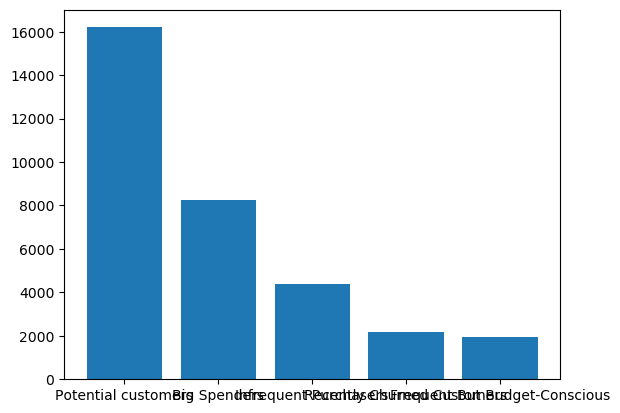

In [60]:
barplot = dict(rfm_segmentation['Segment'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))

In [61]:
# rfm_segmentation= pd.merge([rfm_segmentation, data_rfm_k4.Cluster], on="product_id", how="right")
rfm_segmentation = pd.merge(rfm_segmentation, data_rfm_k4[[ 'Cluster']], on="product_id", how="right")
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,Segment,Cluster
product_id,,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,105,1,120.24,3,1,2,312,6,Infrequent Purchasers,0
00088930e925c41fd95ebfe695fd2655,264,1,143.83,2,1,2,212,5,Infrequent Purchasers,0
0009406fd7479715e4bef61dd91f2462,255,1,242.10,2,1,3,213,6,Infrequent Purchasers,0
000b8f95fcb9e0096488278317764d19,23,2,157.00,4,3,2,432,9,Potential customers,0
000d9be29b5207b54e86aa1b1ac54872,152,1,218.27,3,1,3,313,7,Infrequent Purchasers,0
...,...,...,...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,364,2,285.39,1,3,3,133,7,Potential customers,0
fff81cc3158d2725c0655ab9ba0f712c,34,1,97.89,4,1,2,412,7,Potential customers,0
fff9553ac224cec9d15d49f5a263411f,331,1,43.85,1,1,1,111,3,Recently Churned Customers,0


In [62]:
rfm_segmentation['Cluster'].unique()

array([0, 3, 2, 1])

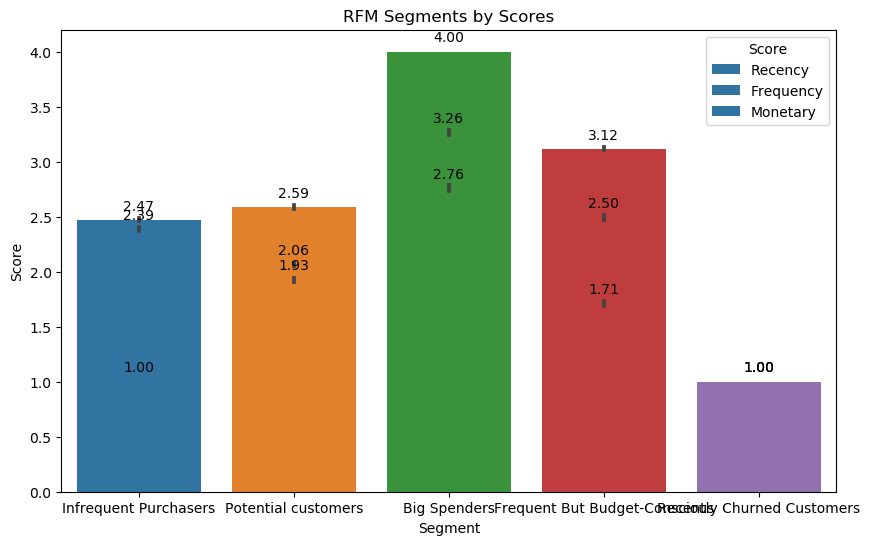

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='R_Quartile', data=rfm_segmentation, label='Recency')
sns.barplot(x='Segment', y='F_Quartile', data=rfm_segmentation, label='Frequency')
sns.barplot(x='Segment', y='M_Quartile', data=rfm_segmentation, label='Monetary')

plt.title('RFM Segments by Scores')
plt.xlabel('Segment')
plt.ylabel('Score')
plt.legend(title='Score')

# add value labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<Figure size 2000x1000 with 0 Axes>

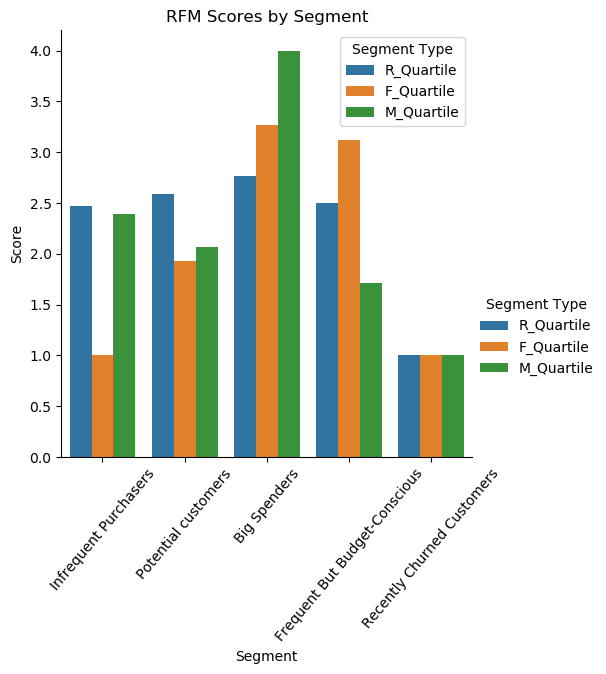

In [64]:
melt_data = pd.melt(rfm_segmentation, id_vars='Segment', value_vars=['R_Quartile', 'F_Quartile', 'M_Quartile'], 
                      var_name='Segment Type', value_name='Score')

plt.figure(figsize=(20, 10))  # add figure size
sns.catplot(data=melt_data, x='Segment', y='Score', hue='Segment Type', kind='bar', ci=None)
plt.title('RFM Scores by Segment')
plt.xlabel('Segment')
plt.ylabel('Score')
plt.legend(title='Segment Type')

plt.xticks(rotation=50)
plt.show()

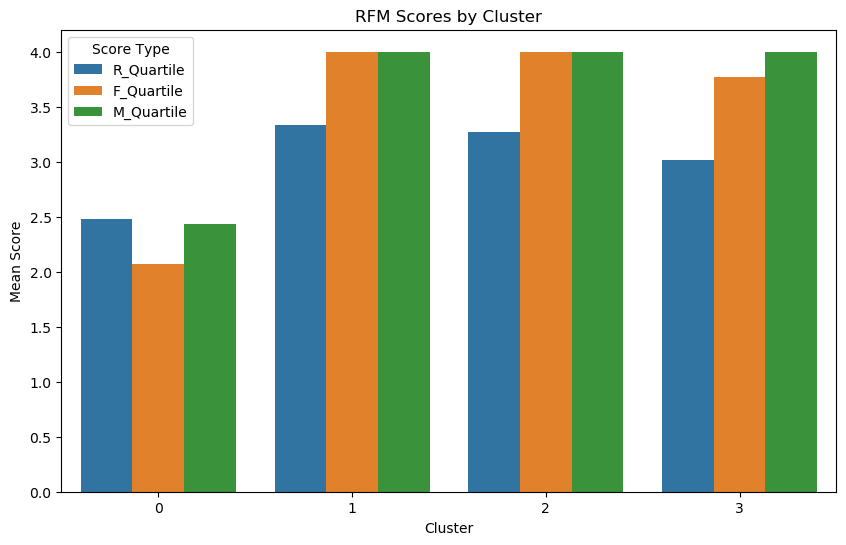

In [65]:
# group the data by cluster and calculate the mean of each RFM score
cluster_means = rfm_segmentation.groupby('Cluster')[['R_Quartile', 'F_Quartile', 'M_Quartile']].mean().reset_index()

# melt the data from wide-form to long-form
melted_data = pd.melt(cluster_means, id_vars='Cluster', value_vars=['R_Quartile', 'F_Quartile', 'M_Quartile'], 
                      var_name='Score Type', value_name='Mean Score')

# create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Cluster', y='Mean Score', hue='Score Type')
plt.title('RFM Scores by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Score')
plt.legend(title='Score Type')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

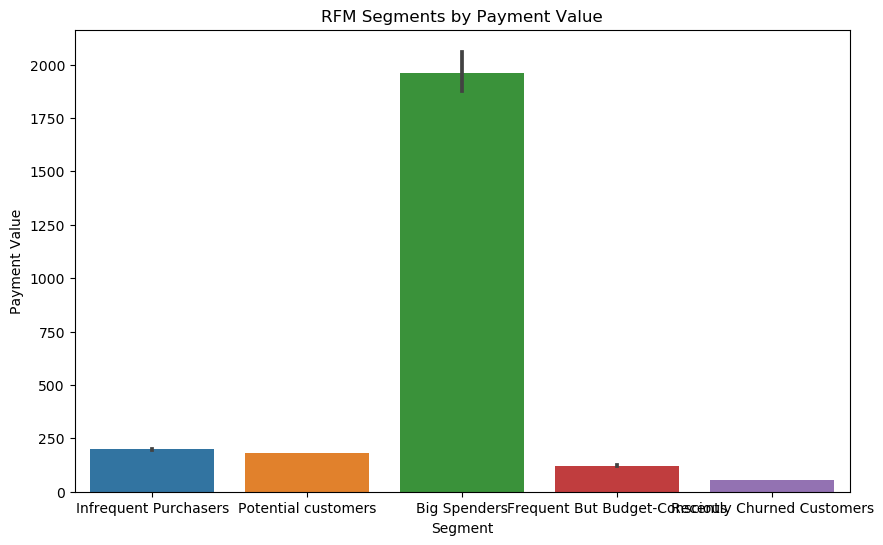

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Monetary', data=rfm_segmentation)
plt.title('RFM Segments by Payment Value')
plt.xlabel('Segment')
plt.ylabel('Payment Value')
plt.show

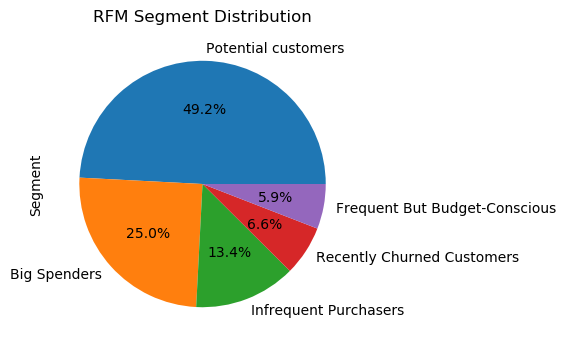

In [67]:
rfm_segmentation['Segment'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('RFM Segment Distribution')
plt.show()

In [68]:
rfm_segmentation['Cluster'].value_counts()

0    31470
3     1314
2      146
1       21
Name: Cluster, dtype: int64

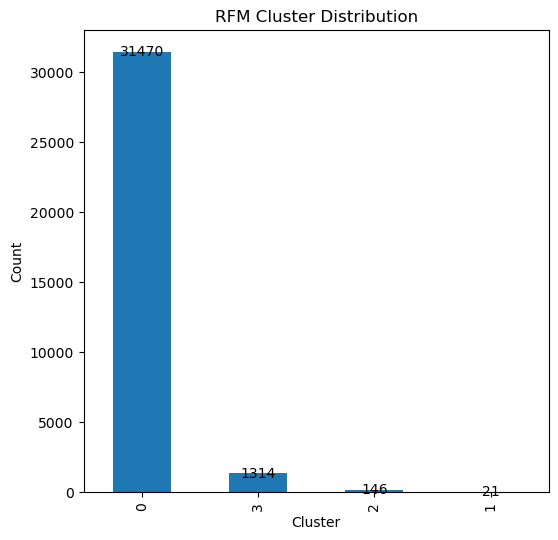

In [69]:
rfm_segmentation['Cluster'].value_counts().plot(kind='bar', figsize=(6, 6))
plt.title('RFM Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.show()

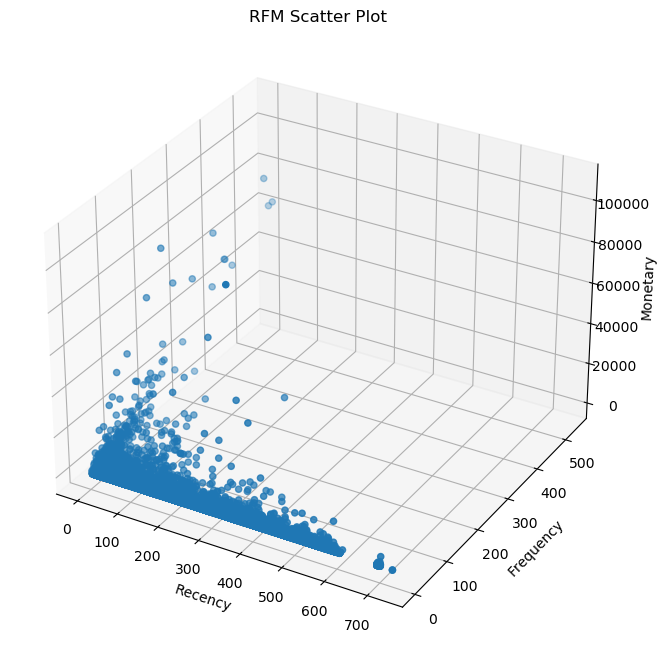

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_segmentation['Recency'], rfm_segmentation['Frequency'], rfm_segmentation['Monetary'])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('RFM Scatter Plot')
plt.show()

In [71]:
rfm_segmentation.corr()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score,Cluster
Recency,1.000000,-0.127937,-0.092827,-0.936485,-0.197097,-0.140721,-0.564693,-0.099689
Frequency,-0.127937,1.000000,0.738311,0.130719,0.317599,0.253221,0.322575,0.373645
Monetary,-0.092827,0.738311,1.000000,0.092848,0.261572,0.303021,0.300271,0.485775
R_Quartile,-0.936485,0.130719,0.092848,1.000000,0.186171,0.135818,0.584801,0.102260
F_Quartile,-0.197097,0.317599,0.261572,0.186171,1.000000,0.589757,0.827579,0.279214
M_Quartile,-0.140721,0.253221,0.303021,0.135818,0.589757,1.000000,0.782670,0.288512
RFM_Score,-0.564693,0.322575,0.300271,0.584801,0.827579,0.782670,1.000000,0.306711
Cluster,-0.099689,0.373645,0.485775,0.102260,0.279214,0.288512,0.306711,1.000000


In [72]:
rfm_segmentation.describe(include='all')

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,Segment,Cluster
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951,32951.000000,32951,32951.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN,Potential customers,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2166,NaN,16204,NaN
mean,211.994689,3.569057,616.313153,2.505569,2.146369,2.499985,NaN,7.151923,NaN,0.129131
std,160.308232,11.007599,2166.897224,1.118349,1.262570,1.118065,NaN,2.573965,NaN,0.600494
min,0.000000,1.000000,9.590000,1.000000,1.000000,1.000000,NaN,3.000000,NaN,0.000000
25%,73.000000,1.000000,92.295000,2.000000,1.000000,1.500000,NaN,5.000000,NaN,0.000000
50%,181.000000,1.000000,198.440000,3.000000,1.000000,2.000000,NaN,7.000000,NaN,0.000000
75%,320.000000,3.000000,480.280000,4.000000,3.000000,3.500000,NaN,9.000000,NaN,0.000000


In [73]:
rfm_segmentation.to_excel('rfm_segmentation.xlsx', index=False)